# ramen_ratings 데이터로 인사이트 발굴하기

데이터
- [ramen_ratings.csv](https://drive.google.com/file/d/1VyvLpQCu4jdpXbYnT_6KVVgflPTA6VZ-/view?usp=sharing)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install -U seaborn
!pip install sklearn
import numpy as np
import pandas as pd

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


본인의 구글 드라이브에 업로드 후 진행

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


상황에 맞게 경로를 수정할 것

In [ ]:
df = pd.read_csv('gdrive/My Drive/Colab/ramen-ratings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


``Stars`` 컬럼 특성 파악

In [ ]:
df.Stars.value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
Unrated      3
4.50         3
4.0          3
3.8          3
4.125        2
3.0          2
2.8          2
1.1          2
2.9          2
2.3          2
3.1          2
3.2          1
2.1          1
2.85         1
0.75         1
3.4          1
3.3          1
3.7          1
0.1          1
2.125        1
3.125        1
0.9          1
3.65         1
3.6          1
1.8          1
3.00         1
Name: Stars, dtype: int64

## Stars 열에 'Unrated' 값을 제거

In [ ]:
# 코딩 추가
indexNames = df[ df['Stars'] == 'Unrated' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.Stars.value_counts()

4        384
5        369
3.75     350
3.5      326
3        173
3.25     170
4.25     143
4.5      132
2.75      85
2         68
2.5       67
4.75      64
1.5       37
1.75      27
1         26
0         26
2.25      21
0.5       14
0.25      11
1.25      10
5.0       10
3.50       9
5.00       7
4.00       6
4.3        4
4.50       3
4.0        3
3.8        3
4.125      2
2.8        2
3.0        2
1.1        2
2.9        2
2.3        2
3.1        2
3.2        1
2.1        1
2.85       1
0.75       1
3.4        1
3.3        1
3.7        1
1.8        1
2.125      1
3.125      1
0.9        1
3.65       1
3.6        1
0.1        1
3.00       1
Name: Stars, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2577 non-null   int64 
 1   Brand     2577 non-null   object
 2   Variety   2577 non-null   object
 3   Style     2575 non-null   object
 4   Country   2577 non-null   object
 5   Stars     2577 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 161.1+ KB


## Stars 열을 float32 타입으로 변경

In [ ]:
# 코딩 추가
df = df.astype({'Stars': 'float32'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2577 non-null   int64  
 1   Brand     2577 non-null   object 
 2   Variety   2577 non-null   object 
 3   Style     2575 non-null   object 
 4   Country   2577 non-null   object 
 5   Stars     2577 non-null   float32
 6   Top Ten   41 non-null     object 
dtypes: float32(1), int64(1), object(5)
memory usage: 151.0+ KB


##``Review #``을 인덱스로 세팅하고 정렬

In [ ]:
# 코딩 추가
df.head()
df = df.set_index('Review #')
df = df.sort_values(by=['Review #'], axis=0)

In [ ]:
df.head()

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN
2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN
3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN
4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN
5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN


## groupby 를 이용하여 ``Brand`` 별 평균 평점 구하여, 내림차순으로 정렬

In [ ]:
# 코딩 추가
grouped = df.groupby(['Brand'])['Stars'].mean()
grouped = grouped.sort_values(ascending=False)
grouped

Brand
Foodmon             5.0
Prima               5.0
Takamori            5.0
Jackpot Teriyaki    5.0
Torishi             5.0
                   ... 
US Canning          0.0
Tiger               0.0
Roland              0.0
Kim Ve Wong         0.0
Hsin Tung Yang      0.0
Name: Stars, Length: 355, dtype: float32

In [ ]:
import seaborn as sns

브랜드가 농심 인 것으로 제한

In [ ]:
nongshim_df = df[df.Brand=='Nongshim']
nongshim_df = nongshim_df[nongshim_df['Country'] != 'United States']

In [ ]:
nongshim_df.Country.value_counts()
nongshim_df

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
19,Nongshim,Shin Ramyun,Pack,South Korea,4.00,NaN
20,Nongshim,Neoguri (Seafood'n'Spicy),Pack,South Korea,3.50,NaN
21,Nongshim,Champong Oriental Noodles,Pack,South Korea,4.00,NaN
22,Nongshim,Ansungtangmyun Noodle Soup,Pack,South Korea,3.75,NaN
113,Nongshim,Hooroorook,Pack,South Korea,4.00,NaN
...,...,...,...,...,...,...
2382,Nongshim,Seaweed Instant Noodle,Cup,South Korea,0.50,NaN
2504,Nongshim,Shin Ramyun,Pack,South Korea,3.00,NaN
2523,Nongshim,Budae Jjigae Noodle Soup,Pack,South Korea,4.50,NaN


## Country를 열로하여, Style 마다 분포를 
중첩하여 그려보자



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


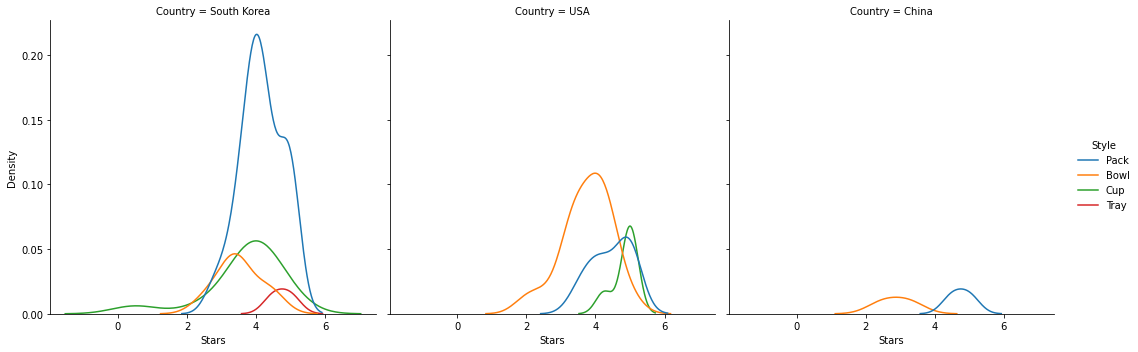

In [ ]:
# 코딩 추가
sns.displot(
    data=nongshim_df, kind="kde",
    x="Stars", hue="Style", col="Country"
)

## Style 마다 Stars 의 통계 정보를 바 그래프로 나타내되, Country를 hue로 설정하여 대비를 나타내게 하자.

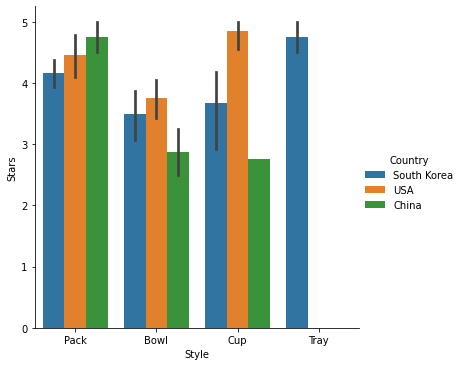

In [ ]:
# 코딩 추가
sns.catplot(data=nongshim_df, kind="bar", x="Style", y="Stars", hue="Country")

## 원본 데이터로부터 어떤 인사이트를 발굴할 수 있는지 고민하고 추가

브랜드가 가장 많은 나라는 그 나라가 더 많은 브랜드를 가지고 있다는 것을 의미할 수 있다. 이에 대해 상위 20개의 나라를 시각화한 결과로 일본이 1위를 차지하고 있고, 미국과 한국이 그 다음 순서를 차지하고 있는 것을 확인할 수 있다.

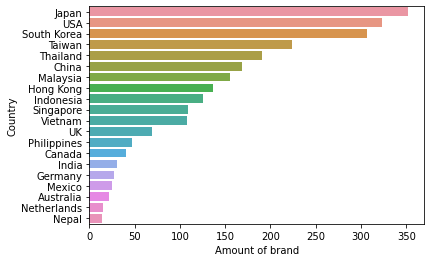

In [ ]:
ramen_countries = df.groupby('Country').agg({'Brand':'count'}).reset_index()
ramen_countries = ramen_countries.rename(columns = {'Brand':'Amount of brand'})
ramen_countries = ramen_countries.sort_values(['Amount of brand', 'Country'], ascending = [False, True])
sns.barplot(data=ramen_countries, x = 'Amount of brand', y="Country", order=df.Country.value_counts().iloc[:20].index)